In [1]:
import sys
sys.path.append('../src/')
from vi_hrg_approx_vMF2D import *
from utils import c2d, hyperdist, p_hd, polar2cart, warn_tensor
from torch import autograd
torch.manual_seed(4)

In [2]:
def noise_r(x, R, rel_var=0.1, epsilon=1e-4):
    rs = torch.distributions.normal.Normal(x, R*rel_var).sample() 
    return torch.clamp(rs, min=0+epsilon, max=R.item()-epsilon)

In [3]:
def noise_phi(x, rel_var=0.1):
    phis = torch.distributions.normal.Normal(x, 2*np.pi*rel_var).sample()
    return phis % (2*np.pi)

In [4]:
logit = lambda x: (x/(1-x)).log()

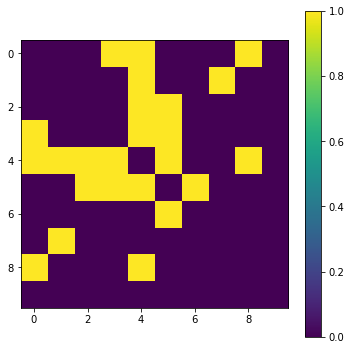

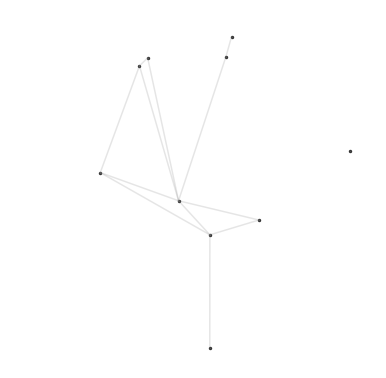

In [5]:
N = 10
R = torch.tensor([5.0]).double()
alpha = .7
T = 0.1

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
G.show()
G.plot()

In [6]:
r_loc_init = logit(noise_r(r, R, rel_var=0.1)/R)*R/5
r_scale_init = torch.ones([N]).double().log()
phi_loc_init = polar2cart(1, noise_phi(theta, 0.1))
phi_loc_init.shape

torch.Size([10, 2])

In [7]:
r_loc_init

tensor([  0.9976,   1.2796,   0.9479,   0.5259, -10.8198,  -0.9847,  10.8198,
          1.5026,   3.1051,   2.6276], dtype=torch.float64)

In [8]:
Radius(r_loc_init, r_scale_init.exp(), R.expand([N])).mean

tensor([3.6530e+00, 3.9119e+00, 3.6035e+00, 3.1427e+00, 1.0000e-04, 1.3598e+00,
        4.9999e+00, 4.0898e+00, 4.7855e+00, 4.6631e+00], dtype=torch.float64)

In [9]:
R_conc_init = torch.tensor(10.).log()
R_scale_init = torch.tensor(1.).log()
alpha_conc_init = torch.tensor(.5).log()
alpha_scale_init = torch.tensor(.5).log()
T_init = torch.tensor([3.,10.]).log()

In [10]:
T_init

tensor([1.0986, 2.3026])

In [11]:
dataloader = DataLoader(EdgesDataset(A), batch_size=N**2, shuffle=True, num_workers=0)
vi = VI_HRG(N,10, init_values={'rs_loc':r_loc_init,
                                'rs_scale':r_scale_init,
                              'phis_loc':phi_loc_init,
                              'phis_scale':None, 
                              'R_conc':R_conc_init, 
                              'R_scale':R_scale_init,
                              'alpha_conc':alpha_conc_init,
                              'alpha_scale':alpha_scale_init,
                              'T':T_init})
vi.dataloader = dataloader
vi.optimizer = torch.optim.RMSprop(vi.parameters())
#vi.optimizer.lr

In [12]:
with autograd.detect_anomaly():
    vi.train(dataloader, lrs=0.001, debug=True, epochs=50)

>>>>>>>>>>>> Start training...


../src/utils.py:126: UserWarning: cd_clamped has 1 in it!
  warnings.warn(str('%s has 1 in it!' % variable))
../src/utils.py:126: UserWarning: c has 1 in it!
  warnings.warn(str('%s has 1 in it!' % variable))
../src/utils.py:126: UserWarning: p_raw has 1 in it!
  warnings.warn(str('%s has 1 in it!' % variable))


-D_kl(R)    >> tensor(-7.4639, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.8525, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor(-0.8176, dtype=torch.float64, grad_fn=<MulBackward0>)
Prob_edges  >> tensor(-424.8431, dtype=torch.float64, grad_fn=<SumBackward0>)
Alpha_R_ri  >> tensor(-2827.5132, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha       >> tensor(-33.5444, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha_R     >> tensor(30.9317, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_ri)     >> tensor(-64.8759, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_phii)   >> tensor(1272.0902, dtype=torch.float64, grad_fn=<MulBackward0>)
ELBO >>>> tensor(-2075.2675, dtype=torch.float64, grad_fn=<AddBackward0>)
Epoch 1 | LR: 0.00 | Total loss: 2075.27 | Epoch time 0.35
-D_kl(R)    >> tensor(-9.5246, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.6422, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor(

-D_kl(R)    >> tensor(-9.1441, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.8042, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor(-0.5439, dtype=torch.float64, grad_fn=<MulBackward0>)
Prob_edges  >> tensor(-285.2807, dtype=torch.float64, grad_fn=<SumBackward0>)
Alpha_R_ri  >> tensor(-3498.5047, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha       >> tensor(-35.0244, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha_R     >> tensor(34.4217, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_ri)     >> tensor(396.0131, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_phii)   >> tensor(1524.2676, dtype=torch.float64, grad_fn=<MulBackward0>)
ELBO >>>> tensor(-1892.9783, dtype=torch.float64, grad_fn=<AddBackward0>)
Epoch 11 | LR: 0.00 | Total loss: 1892.98 | Epoch time 0.28
-D_kl(R)    >> tensor(-9.4659, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.7619, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor

-D_kl(R)    >> tensor(-11.0530, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.7770, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor(-0.5165, dtype=torch.float64, grad_fn=<MulBackward0>)
Prob_edges  >> tensor(-323.7774, dtype=torch.float64, grad_fn=<SumBackward0>)
Alpha_R_ri  >> tensor(-3036.1121, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha       >> tensor(-11.6225, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha_R     >> tensor(3.0471, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_ri)     >> tensor(656.6024, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_phii)   >> tensor(1614.5801, dtype=torch.float64, grad_fn=<MulBackward0>)
ELBO >>>> tensor(-1128.0077, dtype=torch.float64, grad_fn=<AddBackward0>)
Epoch 21 | LR: 0.00 | Total loss: 1128.01 | Epoch time 0.26
-D_kl(R)    >> tensor(-9.6541, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.8509, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor

-D_kl(R)    >> tensor(-11.5576, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.8680, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor(-0.5417, dtype=torch.float64, grad_fn=<MulBackward0>)
Prob_edges  >> tensor(-351.4923, dtype=torch.float64, grad_fn=<SumBackward0>)
Alpha_R_ri  >> tensor(-2042.3238, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha       >> tensor(-31.4097, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha_R     >> tensor(18.6358, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_ri)     >> tensor(710.7897, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_phii)   >> tensor(1662.4406, dtype=torch.float64, grad_fn=<MulBackward0>)
ELBO >>>> tensor(-64.7059, dtype=torch.float64, grad_fn=<AddBackward0>)
Epoch 31 | LR: 0.00 | Total loss: 64.71 | Epoch time 0.26
-D_kl(R)    >> tensor(-11.6864, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.8412, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor(-

-D_kl(R)    >> tensor(-11.4564, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.9070, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tensor(-0.6028, dtype=torch.float64, grad_fn=<MulBackward0>)
Prob_edges  >> tensor(-368.8728, dtype=torch.float64, grad_fn=<SumBackward0>)
Alpha_R_ri  >> tensor(-2471.0444, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha       >> tensor(-23.5225, dtype=torch.float64, grad_fn=<MulBackward0>)
Alpha_R     >> tensor(11.1635, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_ri)     >> tensor(1078.7999, dtype=torch.float64, grad_fn=<MulBackward0>)
P(q_phii)   >> tensor(1695.9065, dtype=torch.float64, grad_fn=<MulBackward0>)
ELBO >>>> tensor(-108.9148, dtype=torch.float64, grad_fn=<AddBackward0>)
Epoch 41 | LR: 0.00 | Total loss: 108.91 | Epoch time 0.26
-D_kl(R)    >> tensor(-11.0703, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(alpha)>> tensor(-0.9255, dtype=torch.float64, grad_fn=<MulBackward0>)
-D_kl(T)    >> tenso

In [13]:
vi.alpha_conc.exp(), vi.alpha_scale.exp()

(tensor(0.7758, dtype=torch.float64, grad_fn=<ExpBackward>),
 tensor(0.2175, dtype=torch.float64, grad_fn=<ExpBackward>))

In [14]:
alpha_conc_init.exp(), alpha_scale_init.exp()

(tensor(0.5000), tensor(0.5000))

In [15]:
vi.R_conc.exp(), vi.R_scale.exp()

(tensor(13.7471, dtype=torch.float64, grad_fn=<ExpBackward>),
 tensor(1.0407, dtype=torch.float64, grad_fn=<ExpBackward>))

In [16]:
R_mean = Gamma(vi.R_conc.exp(), vi.R_scale.exp().reciprocal()).mean.detach()
R_mean

tensor(14.3068, dtype=torch.float64)

In [17]:
vi.rs_loc, vi.rs_scale.exp()

(Parameter containing:
 tensor([ 1.5276,  1.6144,  1.4168,  1.2248, -9.4874,  0.1723,  9.4908,  1.6314,
          2.1350,  1.8376], dtype=torch.float64, requires_grad=True),
 tensor([1.4097, 1.4257, 1.3998, 1.2897, 2.5310, 1.4335, 2.9048, 1.3702, 1.6119,
         1.6039], dtype=torch.float64, grad_fn=<ExpBackward>))

In [18]:
post_r = Radius(vi.rs_loc, vi.rs_scale.exp(), R_mean.expand([N]))

In [19]:
post_r.mean

tensor([1.1755e+01, 1.1932e+01, 1.1515e+01, 1.1058e+01, 1.0844e-03, 7.7683e+00,
        1.4306e+01, 1.1966e+01, 1.2794e+01, 1.2342e+01], dtype=torch.float64,
       grad_fn=<MulBackward0>)

In [20]:
r

tensor([4.2345, 4.2333, 2.1902, 3.0441, 0.6701, 1.5034, 4.9904, 4.8781, 4.3641,
        4.9651], dtype=torch.float64)

In [21]:
r_samp = post_r.sample([50])
post_r.log_prob(r_samp).mean(dim=0)

tensor([-2.3453, -2.1402, -2.2616, -2.3085,  3.9304, -2.5784,  4.2820, -2.0061,
        -1.8337, -2.3398], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [22]:
R_mean.log()

tensor(2.6607, dtype=torch.float64)

In [23]:
vi.phis_loc, vi.phis_scale.exp()

(Parameter containing:
 tensor([[ 0.0184,  1.0672],
         [-0.5120,  0.8672],
         [ 0.6600, -0.1731],
         [-0.6690,  0.7280],
         [-1.2407, -0.0380],
         [ 0.5744, -0.8756],
         [-0.2850, -0.8331],
         [ 1.0343,  0.6322],
         [-0.0949,  0.6394],
         [ 0.7026,  0.7145]], dtype=torch.float64, requires_grad=True),
 tensor([0.8715, 0.5931, 0.6968, 0.8703, 0.8613, 0.5503, 0.7613, 0.6518, 0.4273,
         0.8258], dtype=torch.float64, grad_fn=<ExpBackward>))

In [24]:
post_phi = VonMisesFisher(vi.phis_loc, vi.phis_scale.exp().unsqueeze(dim=-1))

In [25]:
post_phi.entropy()

tensor([1.6717, 1.7554, 1.7266, 1.6721, 1.6751, 1.7662, 1.7072, 1.7395, 1.7937,
        1.6867], dtype=torch.float64, grad_fn=<AddBackward0>)

In [26]:
c2d(post_phi.mean.detach())

tensor([ 1.5536,  2.1042, -0.2565,  2.3140, -3.1110, -0.9902, -1.9004,  0.5487,
         1.7181,  0.7938], dtype=torch.float64)

In [27]:
theta

tensor([2.0038, 1.3498, 5.8199, 2.9752, 3.7382, 4.9988, 4.7971, 1.3427, 1.9266,
        0.2422], dtype=torch.float64)

In [28]:
phi_samp = post_phi.sample(50)
post_phi.log_prob(phi_samp).mean(dim=0)

tensor([-1.6425, -1.7351, -2.0042, -1.7161, -1.6295, -1.7950, -1.6320, -1.7962,
        -1.8283, -1.6886], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [29]:
np.log(2*np.pi)*5

9.189385332046726

In [30]:
Beta(vi.T.exp()[0], vi.T.exp()[1]).sample([50]).mean()

tensor(0.6968, dtype=torch.float64)

In [31]:
p_hd_ = lambda d,R,T: (1.+((d-R)/(2.*T)).exp()).reciprocal()
phd = lambda d,R,T: 0.5 + 0.5*(-(d-R)/(4*T)).tanh()

In [32]:
p_hd_(torch.tensor(-np.inf),R,T)

tensor([1.], dtype=torch.float64)

In [33]:
phd(torch.tensor(5.1),R,T)

tensor([0.3775], dtype=torch.float64)

In [34]:
torch.tensor([0.1,10.0]).log()

tensor([-2.3026,  2.3026])

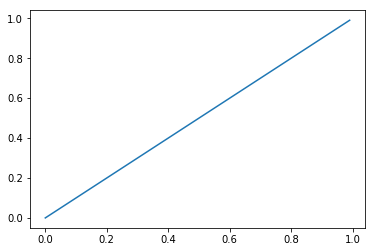

In [35]:
x = torch.arange(0.,1.,.01)
plt.plot(x, torch.sigmoid(logit(x)))
plt.show()

In [36]:
logit(torch.tensor(0.))

tensor(-inf)

In [37]:
l, n, m = 3, 4, 5
broadcast = torch.ones([l,n])

In [38]:
torch.rand(m).expand(n,m).t()

tensor([[0.9075, 0.9075, 0.9075, 0.9075],
        [0.7914, 0.7914, 0.7914, 0.7914],
        [0.6325, 0.6325, 0.6325, 0.6325],
        [0.0570, 0.0570, 0.0570, 0.0570],
        [0.9939, 0.9939, 0.9939, 0.9939]])

In [39]:
torch.arange(n).expand(m,n)

tensor([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]])

In [40]:
torch.tensor(0.).mean()

tensor(0.)

In [41]:
arcosh = lambda x: (torch.clamp(x, min=1.) + (torch.clamp(x, min=1.)**2 - 1).sqrt())
arcosh(torch.arange(0.,2., .1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.5583, 1.8633, 2.1307, 2.3798, 2.6180, 2.8490, 3.0748,
        3.2967, 3.5155])

In [42]:
torch.clamp(x, min=1.)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
np.log(5)

1.6094379124341003

In [44]:
torch.tensor(20.).cosh().pow(5).reciprocal()

tensor(0.)

In [45]:
1/1e-12

1000000000000.0

In [46]:
has_nan = torch.tensor([np.nan, 0, 1.])
torch.where(torch.isnan(has_nan), torch.tensor(np.inf).expand(has_nan.shape), has_nan)

tensor([inf, 0., 1.])

In [47]:
np.exp(50)

5.184705528587072e+21

In [48]:
1e+22*1e+12

1e+34